In [35]:
import pandas as pd
df = pd.read_csv("/Users/inder/Downloads/santander-customer-satisfaction/train.csv")

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg") #Needed to save figures
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [38]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [39]:
id = df.ID
df.drop(["ID"], axis=1, inplace=True)
columns = df.columns
for col in columns:
    if len(df[col].unique())==1:
        df.drop([col], axis=1, inplace=True)

In [40]:
columns = df.columns
for col in columns:
    print(col,"\n",df[col].value_counts(),"\n\n")

var3 
  2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64 


var15 
 23     20170
24      6232
25      4217
26      3270
27      2861
       ...  
97         3
104        2
98         1
105        1
101        1
Name: var15, Length: 100, dtype: int64 


imp_ent_var16_ult1 
 0.00        72301
300.00        221
150.00        217
600.00        172
900.00        164
            ...  
17595.15        1
84.00           1
168.75          1
139.68          1
540.66          1
Name: imp_ent_var16_ult1, Length: 596, dtype: int64 


imp_op_var39_comer_ult1 
 0.00      66075
30.00       120
60.00       100
15.00        56
90.00        48
          ...  
158.85        1
444.30        1
254.10        1
918.99        1
309.15        1
Name: imp_op_var39_comer_ult1, Length: 7551, dtype: int64 


imp_op_var39_comer_ult3 
 0.00     

num_op_var40_ult3 
 0      75772
3         48
6         39
12        27
24        17
15        16
9         15
21        12
18         9
30         8
33         8
42         6
36         5
27         5
45         5
39         3
54         3
75         2
60         2
69         2
63         2
48         1
84         1
177        1
351        1
180        1
87         1
90         1
264        1
57         1
189        1
171        1
66         1
129        1
51         1
Name: num_op_var40_ult3, dtype: int64 


num_op_var41_hace2 
 0      67679
3       2617
6       1405
9        865
12       624
15       467
18       377
21       313
24       255
27       242
30       180
33       142
36       130
39       107
42        84
45        81
48        62
51        47
54        43
57        38
60        35
66        32
63        29
69        23
72        18
78        15
75        13
84        10
105       10
93         9
81         9
90         9
99         8
96         7
102        6
87      

saldo_var37 
 0.00       71059
159.21        36
30.00         23
160.77        22
120.12        18
           ...  
18.12          1
185.01         1
227.79         1
2687.76        1
56.16          1
Name: saldo_var37, Length: 4041, dtype: int64 


saldo_var40 
 0.00       75737
900.00         2
4035.00        2
2003.13        1
1592.64        1
           ...  
499.20         1
1876.56        1
2140.89        1
2582.76        1
1055.58        1
Name: saldo_var40, Length: 282, dtype: int64 


saldo_var42 
 0.00       21786
3.00       18593
90.00       5255
30.00       1762
15.00       1604
           ...  
257.85         1
900.30         1
2986.53        1
526.59         1
111.12         1
Name: saldo_var42, Length: 15730, dtype: int64 


saldo_var44 
 0.00         75891
65439.45         2
79446.30         1
525551.40        1
14594.88         1
             ...  
48459.90         1
2107.80          1
321873.27        1
12530.70         1
37985.22         1
Name: saldo_var44, Length: 

imp_trasp_var17_out_ult1 
 0.00        76016
3059.52         1
69599.01        1
69622.29        1
3192.27         1
Name: imp_trasp_var17_out_ult1, dtype: int64 


imp_trasp_var33_in_hace3 
 0.00        76014
33079.83        1
44251.08        1
49581.27        1
25501.80        1
33744.48        1
25920.03        1
Name: imp_trasp_var33_in_hace3, dtype: int64 


imp_trasp_var33_in_ult1 
 0.00        76015
2545.65         1
174.09          1
2596.53         1
5400.00         1
13207.32        1
Name: imp_trasp_var33_in_ult1, dtype: int64 


imp_trasp_var33_out_ult1 
 0       76019
3000        1
Name: imp_trasp_var33_out_ult1, dtype: int64 


imp_venta_var44_hace3 
 0.00         76017
23.16            1
209834.40        1
78040.59         1
Name: imp_venta_var44_hace3, dtype: int64 


imp_venta_var44_ult1 
 0.00          75976
361.14            1
33096.60          1
377.58            1
21952.50          1
2754476.46        1
21141.51          1
24617.70          1
7267.05           1
81

num_trasp_var33_in_hace3 
 0    76014
3        6
Name: num_trasp_var33_in_hace3, dtype: int64 


num_trasp_var33_in_ult1 
 0    76015
3        4
6        1
Name: num_trasp_var33_in_ult1, dtype: int64 


num_trasp_var33_out_ult1 
 0    76019
3        1
Name: num_trasp_var33_out_ult1, dtype: int64 


num_venta_var44_hace3 
 0    76017
3        2
6        1
Name: num_venta_var44_hace3, dtype: int64 


num_venta_var44_ult1 
 0     75976
3        24
6         7
9         4
12        3
27        2
21        2
39        1
15        1
Name: num_venta_var44_ult1, dtype: int64 


num_var45_hace2 
 0      48881
3       8276
6       4667
9       3112
12      2264
       ...  
186        1
270        1
237        1
342        1
255        1
Name: num_var45_hace2, Length: 85, dtype: int64 


num_var45_hace3 
 0      50663
3       9493
6       4745
9       2872
12      1887
       ...  
174        1
177        1
180        1
252        1
156        1
Name: num_var45_hace3, Length: 66, dtype: int64 



In [41]:
df.drop(["num_var1"], axis=1, inplace=True)
df.drop(["num_var1_0"], axis=1, inplace=True)

In [42]:
corr = df.corr()

In [43]:
correlations = corr['TARGET'].sort_values()

In [44]:
correlations.head(7)

ind_var30             -0.149811
num_meses_var5_ult3   -0.148253
num_var30             -0.138289
num_var42             -0.135693
ind_var5              -0.135349
num_var5              -0.134095
num_var4              -0.080194
Name: TARGET, dtype: float64

In [45]:
correlations.tail(4)

ind_var8_0    0.046665
var15         0.101322
var36         0.102919
TARGET        1.000000
Name: TARGET, dtype: float64

In [46]:
iatt = ['ind_var30',
 'num_meses_var5_ult3',
 'num_var30',
 'num_var42',
 'ind_var5',
 'num_var5',
 'var15',
 'var36']

In [47]:
columns=df.columns
i=0
delt=[]
sett=[]
for col1 in columns[:len(columns)-2]:
    i=i+1
    delt.append(" ")
    delt.append(col1)
    for col2 in columns[i:len(columns)-1]:
        if corr.loc[col1,col2]>0.999:
            delt.append(col2)   

In [48]:
delt

[' ',
 'var3',
 ' ',
 'var15',
 ' ',
 'imp_ent_var16_ult1',
 ' ',
 'imp_op_var39_comer_ult1',
 ' ',
 'imp_op_var39_comer_ult3',
 ' ',
 'imp_op_var40_comer_ult1',
 ' ',
 'imp_op_var40_comer_ult3',
 ' ',
 'imp_op_var40_efect_ult1',
 ' ',
 'imp_op_var40_efect_ult3',
 ' ',
 'imp_op_var40_ult1',
 ' ',
 'imp_op_var41_comer_ult1',
 ' ',
 'imp_op_var41_comer_ult3',
 ' ',
 'imp_op_var41_efect_ult1',
 ' ',
 'imp_op_var41_efect_ult3',
 'imp_op_var39_efect_ult3',
 ' ',
 'imp_op_var41_ult1',
 ' ',
 'imp_op_var39_efect_ult1',
 ' ',
 'imp_op_var39_efect_ult3',
 ' ',
 'imp_op_var39_ult1',
 ' ',
 'imp_sal_var16_ult1',
 ' ',
 'ind_var1_0',
 ' ',
 'ind_var1',
 ' ',
 'ind_var5_0',
 ' ',
 'ind_var5',
 ' ',
 'ind_var6_0',
 'ind_var29_0',
 'num_var6_0',
 'num_var29_0',
 ' ',
 'ind_var6',
 'ind_var29',
 'num_var6',
 'num_var29',
 ' ',
 'ind_var8_0',
 'num_var8_0',
 ' ',
 'ind_var8',
 'num_var8',
 ' ',
 'ind_var12_0',
 ' ',
 'ind_var12',
 ' ',
 'ind_var13_0',
 ' ',
 'ind_var13_corto_0',
 ' ',
 'ind_var13_corto

In [49]:
corr.loc["imp_op_var41_efect_ult3","imp_op_var39_efect_ult3"]

0.9992709342537949

(array([4.0000e+00, 2.0000e+01, 7.4000e+01, 2.6400e+02, 1.0990e+03,
        3.3920e+03, 8.9440e+03, 9.7310e+03, 3.3289e+04, 1.9203e+04]),
 array([185., 199., 213., 227., 241., 255., 269., 283., 297., 311., 325.]),
 <a list of 10 Patch objects>)

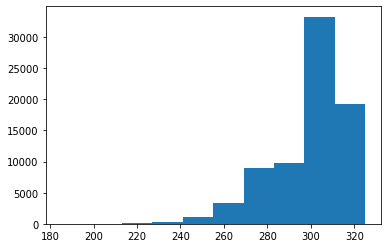

In [50]:
X = df.iloc[:,:-1]
X['n0'] = (X==0).sum(axis=1)
plt.hist(X["n0"])

In [51]:
from sklearn.preprocessing import scale , Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
Binarizer().fit_transform(scale(X))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [52]:
scale(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [53]:
df['var3'].replace({-999999: 2}, inplace = True)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
poly_transformer = PolynomialFeatures(degree = 2)
pdf = poly_transformer.fit_transform(normalize(df[iatt].values))
iattp = poly_transformer.get_feature_names(input_features = iatt)

In [55]:
for i,col in enumerate(iattp[9:]):
    df[col]=pdf[:,i+9]

In [56]:
from sklearn.decomposition import PCA
X_normalized = normalize(df.drop(["TARGET"], axis=1).values, axis=0)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

In [57]:
X=normalize(df.drop(["TARGET"], axis=1).values, axis=0)

In [58]:
y = df["TARGET"]
ratio = float(np.sum(y == 1)) / np.sum(y==0)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1301, stratify=y, test_size=0.4)

In [60]:
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 5,
                n_estimators=1000,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                scale_pos_weight = ratio,
                reg_alpha=0.03,
                seed=1301)
                
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.5	validation_1-auc:0.5
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.5	validation_1-auc:0.5
[2]	validation_0-auc:0.5	validation_1-auc:0.5
[3]	validation_0-auc:0.5	validation_1-auc:0.5
[4]	validation_0-auc:0.5	validation_1-auc:0.5
[5]	validation_0-auc:0.5	validation_1-auc:0.5
[6]	validation_0-auc:0.5	validation_1-auc:0.5
[7]	validation_0-auc:0.5	validation_1-auc:0.5
[8]	validation_0-auc:0.5	validation_1-auc:0.5
[9]	validation_0-auc:0.5	validation_1-auc:0.5
[10]	validation_0-auc:0.5	validation_1-auc:0.5
[11]	validation_0-auc:0.5	validation_1-auc:0.5
[12]	validation_0-auc:0.5	validation_1-auc:0.5
[13]	validation_0-auc:0.5	validation_1-auc:0.5
[14]	validation_0-auc:0.682849	validation_1-auc:0.694477
[15]	validation_0-auc:0.682849	validation_1-auc:0.694477
[16]	validation_0-auc:0.682849	validation_1-auc:0.694477
[17]	validation_0-auc:0.

[144]	validation_0-auc:0.851214	validation_1-auc:0.841009
[145]	validation_0-auc:0.851328	validation_1-auc:0.841031
[146]	validation_0-auc:0.851445	validation_1-auc:0.841006
[147]	validation_0-auc:0.851561	validation_1-auc:0.841063
[148]	validation_0-auc:0.851683	validation_1-auc:0.841102
[149]	validation_0-auc:0.85174	validation_1-auc:0.841092
[150]	validation_0-auc:0.851892	validation_1-auc:0.841158
[151]	validation_0-auc:0.85202	validation_1-auc:0.841178
[152]	validation_0-auc:0.8522	validation_1-auc:0.841227
[153]	validation_0-auc:0.852317	validation_1-auc:0.841236
[154]	validation_0-auc:0.852392	validation_1-auc:0.841208
[155]	validation_0-auc:0.852421	validation_1-auc:0.841246
[156]	validation_0-auc:0.852479	validation_1-auc:0.8413
[157]	validation_0-auc:0.852583	validation_1-auc:0.841163
[158]	validation_0-auc:0.852675	validation_1-auc:0.84115
[159]	validation_0-auc:0.852742	validation_1-auc:0.841131
[160]	validation_0-auc:0.852869	validation_1-auc:0.841195
[161]	validation_0-au

[286]	validation_0-auc:0.863946	validation_1-auc:0.841998
[287]	validation_0-auc:0.863987	validation_1-auc:0.842068
[288]	validation_0-auc:0.864035	validation_1-auc:0.842039
[289]	validation_0-auc:0.864045	validation_1-auc:0.84198
[290]	validation_0-auc:0.864184	validation_1-auc:0.841937
[291]	validation_0-auc:0.864235	validation_1-auc:0.841943
[292]	validation_0-auc:0.8643	validation_1-auc:0.841913
[293]	validation_0-auc:0.864448	validation_1-auc:0.841897
[294]	validation_0-auc:0.864555	validation_1-auc:0.841926
[295]	validation_0-auc:0.864596	validation_1-auc:0.842003
[296]	validation_0-auc:0.864661	validation_1-auc:0.842006
[297]	validation_0-auc:0.86485	validation_1-auc:0.842008
[298]	validation_0-auc:0.864885	validation_1-auc:0.842024
[299]	validation_0-auc:0.864902	validation_1-auc:0.842026
[300]	validation_0-auc:0.864938	validation_1-auc:0.842047
[301]	validation_0-auc:0.865015	validation_1-auc:0.842077
[302]	validation_0-auc:0.865185	validation_1-auc:0.842064
[303]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=9999999999, n_estimators=1000,
              n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.03, reg_lambda=1,
              scale_pos_weight=0.04119870706185284, seed=1301, silent=None,
              subsample=1.0, verbosity=1)

In [2]:
from sklearn.cluster import KMeans
import numpy as np
data=np.array(range(1000)).reshape(-1,1)/1000.
k=10
kwargs = {
    "n_clusters": k,
    "init":data[:k],
    "n_init":1,
    "tol":1e-4,
    "verbose":1
}
km1=KMeans(algorithm="elkan", **kwargs); km1.fit(data)
print(f"elkan: inertia= {km1.inertia_:10.7f} n_iter= {km1.n_iter_}")


km2=KMeans(algorithm="full",  **kwargs); km2.fit(data)
print(f"full:  inertia= {km2.inertia_:10.7f} n_iter= {km2.n_iter_}")


inside KMeans class inside _init_ function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file before assining to self.algorithim


 algorithim assigined :  elkan 


 inside njobs=1 if statement 


inside _kmeans_single_elkan function in _Kmeans.py file at start 

Initialization complete

inside _kmeans_single_elkan function in _Kmeans.py file before calling k_means_elkan function 

start iteration
done sorting
end inner loop
Iteration 0, inertia 81.10344
start iteration
done sorting
end inner loop
Iteration 1, inertia 35.590232
start iteration
done sorting
end inner loop
Iteration 2, inertia 22.3640045
start iteration
done sorting
end inner loop
Iteration 3, inertia 16.3137695
start iteration
done sorting
end inner loop
Iteration 4, inertia 12.8087895
start iteration
done sorting
end inner loop
Iteration 5, inertia 10.58454
start iteration
done sorting
end inner loop
Iteration

Iteration 13, inertia 4.554

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 14, inertia 4.239

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 15, inertia 3.963

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 16, inertia 3.716

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 17, inertia 3.498

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 18, inertia 3.310

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 19, inertia 3.140

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 20, inertia 2.984

inside _kmeans_single_lloyd function in _Kmeans.py file before to comparision squared_norm 

Iteration 21, inertia 2.